# Phys 250 HW10

# Caden Kacmarynski CRK97

In [1]:
#Initialization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

## Problem 1. 
(10 points) Write a python routine that performs a least squares fit to the line
y = a1 + a2x.
Your function should be defined so that it optionally accepts uncertainties; if not provided, the
uncertainties are assumed to be one. To get you started, the function should be of the following
form. \
Include the code as your solution. No loops are
required in this function. It is much easier to write the code without loops. You will use this
code in the following problem. You can test it by comparing the output to that generated from
scipy.optimize.curve_fit.

In [2]:
def linear_leastsq (x, y, sigma=None) :
    """
    Finds least squares fit to y = a1 + (a2)x
    
    Returns best fit params (a1,a2,sigma_a1,sigma_a2)
    
    Params:
    -------
    x : Array of the independent variable.
    y : Array of the "data"
    sigma : Array, optional. If specified it is the
    uncertainty in each data point. If not specified
    all the uncertainties are set to one.
    """
    if sigma is None :
        sigma = np.ones_like(y) # This sets sigma=1 for each y    
    Sum = np.sum(1./sigma**2)
    Sumx = np.sum(x/sigma**2)
    Sumy = np.sum(y/sigma**2)
    Sumxx = np.sum(x*x/sigma**2)
    Sumxy = np.sum(x*y/sigma**2)
    Delta = Sum*Sumxx - Sumx**2
    #returns
    a1 = (Sumxx*Sumy - Sumx*Sumxy) / Delta
    a2 = (Sumxy*Sum - Sumx*Sumy) / Delta
    sigma_a1 = np.sqrt(Sumxx/Delta)
    sigma_a2 = np.sqrt(Sum/Delta)
    return (a1, a2, sigma_a1, sigma_a2)

## Problem 2. 
(10 points) Consider the data
x {-2 -1 0 1 2}
y {-4 -7 -3 -3 -2}
We will fit this data to a line using our routine from the previous problem

### (i) 
Fit the data to a line using your function from the previous problem. Determine and print
the best fit parameters a1 and a2, along with their uncertainties, the χ
2 and the reduced
chi-squared, $\chi^2_v $

In [3]:
x = np.array([-2, -1 ,0 , 1, 2])
y = np.array([-4., -7, -3, -3, -2])
(a1, a2, sigma_a1, sigma_a2) = linear_leastsq(x, y)
dof = len(x) - 2
chisq = np.sum((y - a1 - a2*x)**2)
chisq_red = chisq/dof
print(f"""
Best fit :
a1: {a1}
Uncertainty in a1: {sigma_a1}
a2: {a2}
Uncertainty in a2: {sigma_a2}
Chi^2 = {chisq}
Reduced chi^2 = {chisq_red}""")


Best fit :
a1: -3.8
Uncertainty in a1: 0.4472135954999579
a2: 0.8
Uncertainty in a2: 0.31622776601683794
Chi^2 = 8.4
Reduced chi^2 = 2.8000000000000003


### (ii)
One of the points will be far from the line you fit in the previous part. Which point is the
outlier?


outlier is at = (-1, -7.0)


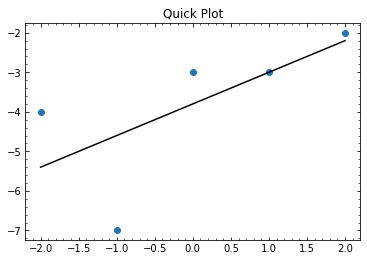

In [4]:
chisq_per_point = (y - a1 - a2*x)**2
plt.plot(x, y, 'o')
yVals = a1 + a2 * x
plt.plot(x, yVals, 'k');
plt.title("Quick Plot")
print(f"""outlier is at = {x[1],y[1]}""")

### (iii) 
Remove the outlier from the data set and then repeat part (i). [Note: In practice we cannot
just throw away data because it does not fit well. We would need some other reason, unrelated
to the model we are trying to fit, to reject the data. Without a compelling reason, the data
must be used as provided and without modification!]


New Best fit :
a1: -3.1142857142857143
Uncertainty in a1: 0.50709255283711
a2: 0.45714285714285713
Uncertainty in a2: 0.3380617018914066
Chi^2 = 0.17142857142857143
Reduced chi^2 = 0.08571428571428572


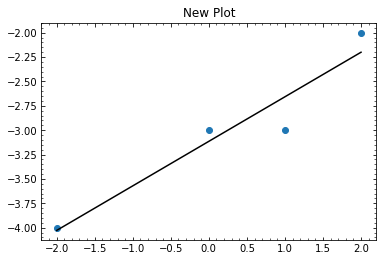

In [5]:
i = ~((x>-1.5) & (x<-0.5))
(a1, a2, sigma_a1, sigma_a2) = linear_leastsq(x[i], y[i])
dof = len(x[i]) - 2
chisq = np.sum((y[i] - a1 - a2*x[i])**2)
chisq_red = chisq/dof
print(f"""
New Best fit :
a1: {a1}
Uncertainty in a1: {sigma_a1}
a2: {a2}
Uncertainty in a2: {sigma_a2}
Chi^2 = {chisq}
Reduced chi^2 = {chisq_red}""")

plt.plot(x[i], y[i], 'o')
yVals = a1 + a2 * x
plt.plot(x, yVals,'k')
plt.title("New Plot")
plt.show()

## Problem 3. 
(10 points) In the previous homework we encountered the Hilbert matrix and saw that
it is ill-conditioned. This is not just a matrix invented by a mathematician to create problems†
but instead can appear in a minimization problem. Suppose we are given a known function g(x)
and wish to expand it in a finite power series so that
g(x) ≈
Xn
i=0
aix
i
.
To find the coefficients, ai
, we could minimize a “χ
2
-like” quantity we define as
X2 ≡
Z 1
0
"
g(x) −
Xn
i=0
aix
i
#2
dx
Notice that if the integral were replaced by a sum over a finite number of points this would just
be the χ
2
. When we minimize X2 with respect to the coefficients ai we end up with a system of
linear equations that can be written in the familiar form
Aa = b,
where now a is a vector with components given by the coefficients ai
. This system of linear
equations can then be solved.

### (i) 
Perform the minimization and find the expression for the components of b. These will depend
on g(x), but, when this method is applied, a particular functional form for g(x) would be
given and actual numerical values for the components of b would be known.

Start with
$$X^2\equiv\int_0^1\left[g(x)-\sum^n_{i=0}a_ix^i\right]^2dx
$$
Derive
$$\frac{\partial X^2}{\partial a_j}=0=2\int_0^1\left[g(x)-\sum^n_{i=0}a_ix^i\right](-x^j)dx
$$
Multipy by $(-x^j)$, (dropped the 2 because expressoin is = 0)
$$\int_0^1\left[\sum^n_{i=0}a_ix^{i+j}-x^jg(x)\right]dx=0
$$
Break integral into two parts and set equal
$$\sum^n_{i=0}a_i\int_0^1x^{i+j}dx=\int_0^1x^jg(x)dx
$$
Rewrite
$$\sum^n_{i=0}\frac{a_i}{i+j+1}=\int_0^1x^jg(x)dx
$$
Left side is now Aa so right side is b
$$b_i=\int_0^1x^jg(x)dx
$$

### (ii) 
Again from the minimization determine the components of the matrix A. You should find
that the Aij are precisely the components of the Hilbert matrix. [Note: It can be useful to
consider a small n case, such as n = 2, to more directly see the structure of the matrix. The
results can be generalized to arbitrary n from there.]

We can find
$$\vec a = 
\begin{pmatrix}
    a_0 \\
    a_1 \\
    a_2
\end{pmatrix}, \hspace{10pt}
\mathsf{A} =
\begin{pmatrix}
    1 & \frac12 & \frac13 \\
    \frac12 & \frac13 & \frac14 \\
    \frac13 & \frac14 & \frac15
\end{pmatrix}
$$
So we can write
$$A_{ij} \equiv \frac{1}{i+j+1}
$$